In [1]:
import sys
import logging
import pickle
import yaml
import matplotlib.cm as cm
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import time
import configs
import seaborn as sns

# Helper function

In [110]:
def plot_latents_w_true_transitions(model):
    model = f'{generic_exp_name}_{model}'
    colors = ['C0', 'C1', 'C2', 'C3']
    markers = ['s', '^', 'o']
    iterations = np.unique(repr_df[repr_df['model']==model]['iteration'])
    for i in iterations:
        # Load data and labels
        _df = repr_df[(repr_df['model']==model) & (repr_df['iteration']==i)]
        latents = np.array(list(_df['latents']))
        quadrant_labels = np.array(list(_df['quadrant']))
        xs = np.array(list(_df['x']))
        ys = np.array(list(_df['y']))
        goal_state = _df.iloc[0]['goal_state']

        # PCA reduction
        reducer = PCA(n_components=3)
        reducer.fit(latents)
        reduced_latents = reducer.transform(latents)

        # Plot
        fig = plt.figure()
        ax = fig.add_subplot(111,projection='3d')
        for i in np.arange(reduced_latents.shape[0]):
            # Draw points
            x = xs[i]; y = ys[i]
            color=colors[quadrant_labels[i]]
            if [x,y] == goal_state:
                color='red'
            ax.scatter(
                reduced_latents[i,0], reduced_latents[i,1], reduced_latents[i,2],
                color=color, marker='X', alpha=0.75, s=50)
            # Now draw edges
            for offset in [[-1,0], [1,0], [0,-1], [0,1]]:
                _x = x + offset[0]; _y = y + offset[1]
                j = np.argwhere(np.logical_and(xs==_x, ys==_y))
                if len(j)==0: continue
                j = j[0,0]
                ax.plot(
                    [reduced_latents[i,0], reduced_latents[j,0]],
                    [reduced_latents[i,1], reduced_latents[j,1]],
                    [reduced_latents[i,2], reduced_latents[j,2]],
                    color='gray', alpha=0.3
                    )
        plt.show()

In [111]:
def plot_latents_w_estimated_transitions(model):
    model = f'{generic_exp_name}_{model}'
    colors = ['C0', 'C1', 'C2', 'C3']
    markers = ['s', '^', 'o']
    actions = [0,1,2,3]
    action_colors = ['lightgrey', 'darkgrey', 'gray', 'dimgray']
    actions = [0,1,2,3]
    iterations = np.unique(repr_df[repr_df['model']==model]['iteration'])
    for i in iterations:
        _df = repr_df[(repr_df['model']==model) & (repr_df['iteration']==i)]
        _tdf = transition_df[
            (transition_df['model']==model) & (transition_df['iteration']==i)]
        latents = np.array(list(_df['latents']))
        quadrant_labels = np.array(list(_df['quadrant']))
        reducer = PCA(n_components=3)
        reducer.fit(latents)
        reduced_latents = reducer.transform(latents)

        fig = plt.figure()
        ax = fig.add_subplot(111,projection='3d')
        for i in np.arange(reduced_latents.shape[0]):
            x = _df.iloc[i]['x']
            y = _df.iloc[i]['y']
            pca_x, pca_y, pca_z = reduced_latents[i]
            ax.scatter(
                pca_x, pca_y, pca_z, color=colors[quadrant_labels[i]],
                marker='X', alpha=0.75, s=50)
            for a in actions:
                _trow = _tdf[(_tdf['x']==x) & (_tdf['y']==y) & (_tdf['action']==a)]
                transition = np.array(list(_trow['outputs']))
                reduced_transition = reducer.transform(transition)
                t_x, t_y, t_z = reduced_transition[0]
                plt.plot([pca_x, t_x], [pca_y, t_y], zs=[pca_z, t_z],
                    color=action_colors[a], alpha=0.6)
        plt.show()

# Basic comparisons with MF

### Parameters

In [117]:
internal_dim = 10
generic_exp_name = 'new_gridworld8x8'
network_yaml = 'dm'
episode = 350
hue_order = ['mf0', 'entro-1', 'g0_-2_entro-2']

In [118]:
engram_dir = '/Volumes/aronov-locker/Ching/rl/'
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/' # Axon path
exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

### Load and Plot

In [119]:
with open(f'{analysis_dir}representation_df_ep{episode}.p', 'rb') as f:
    repr_df = pickle.load(f)
with open(f'{analysis_dir}dimensionality_df_ep{episode}.p', 'rb') as f:
    dim_df = pickle.load(f)
with open(f'{analysis_dir}transition_df_ep{episode}.p', 'rb') as f:
    transition_df = pickle.load(f)
dim_df.model = dim_df.model.str[len(generic_exp_name)+1:]

### 3d latent plots + true transitions

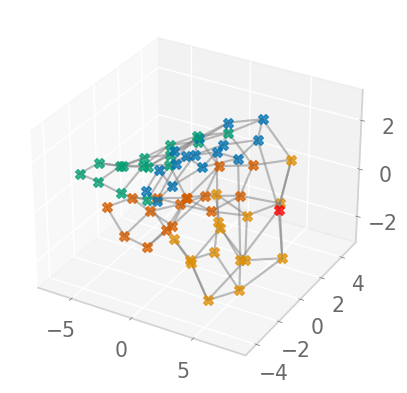

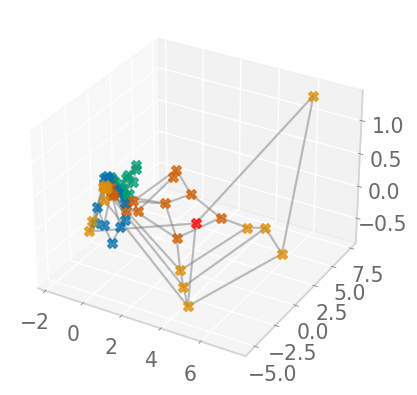

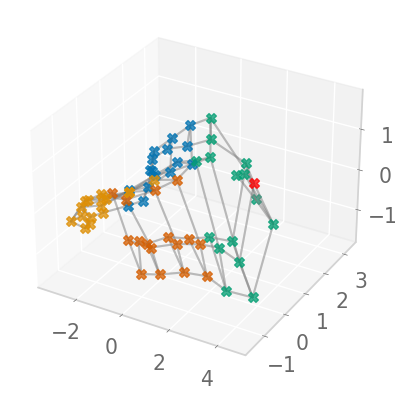

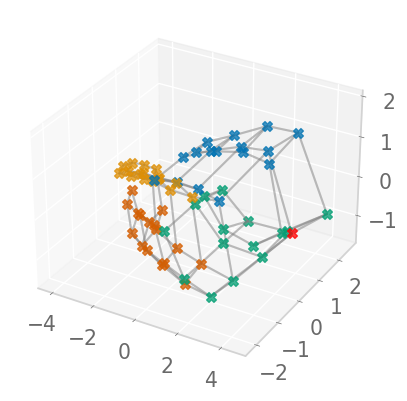

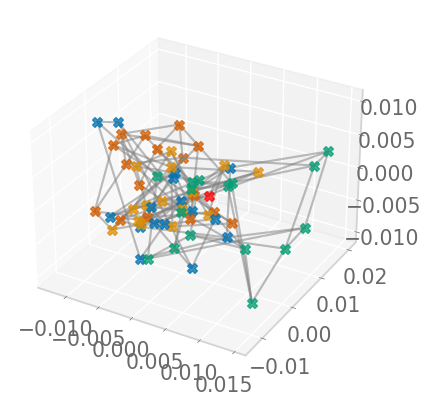

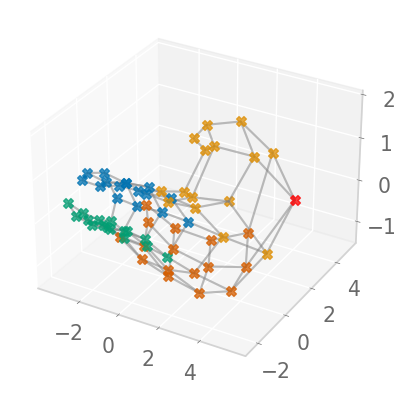

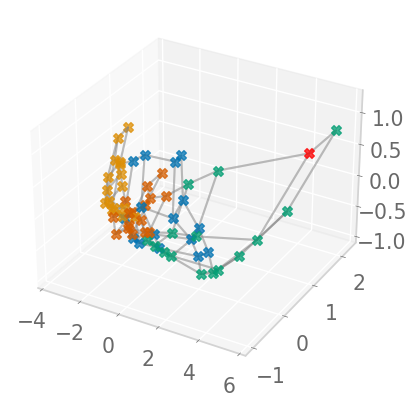

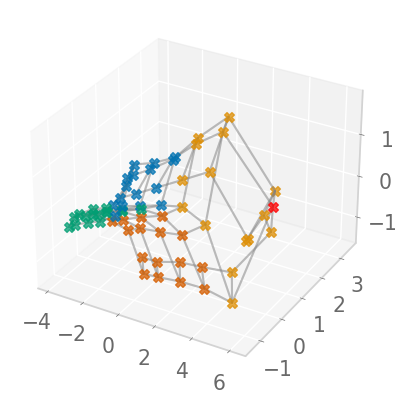

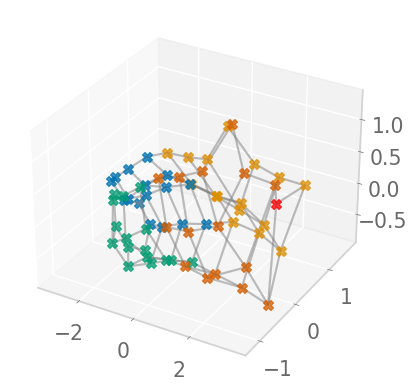

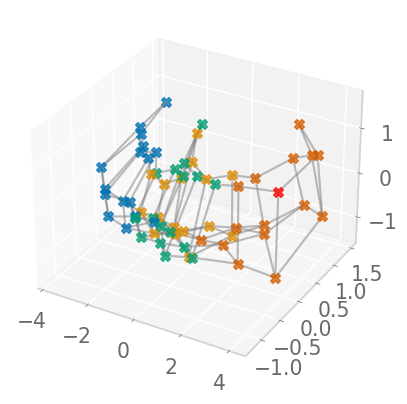

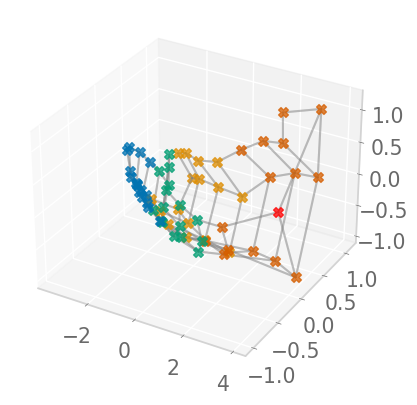

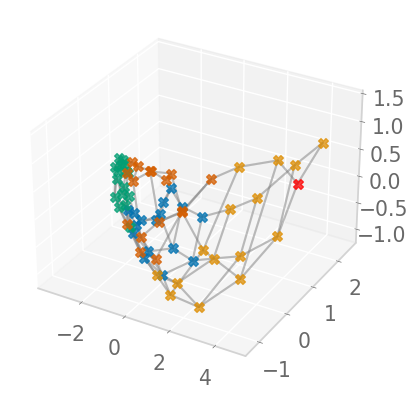

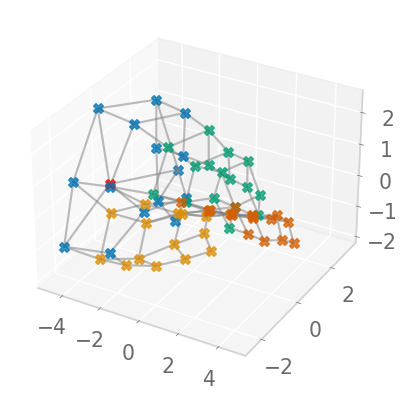

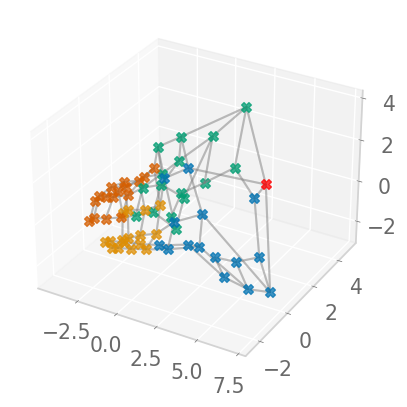

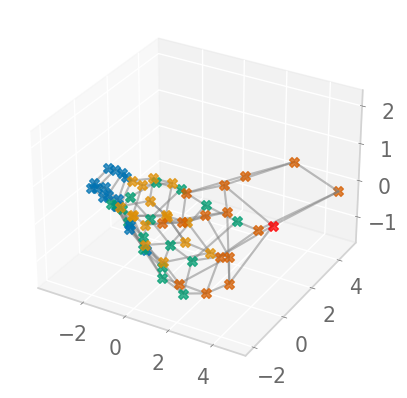

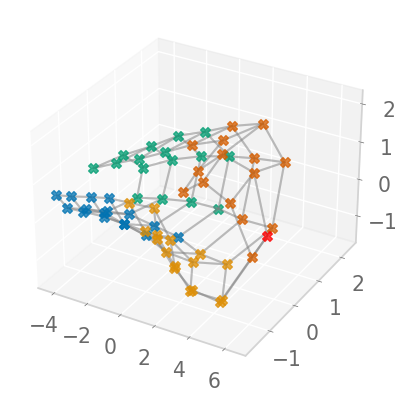

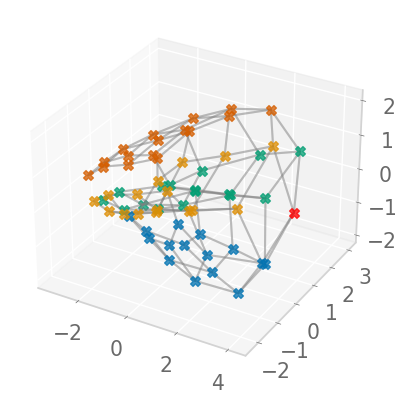

In [120]:
# MF
plot_latents_w_true_transitions(hue_order[0])

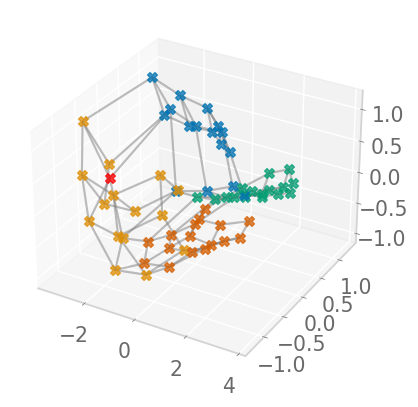

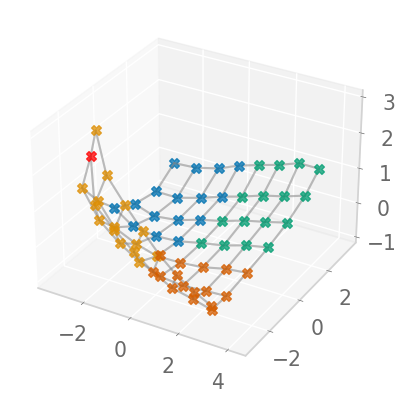

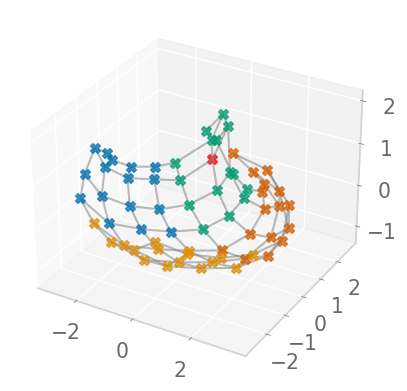

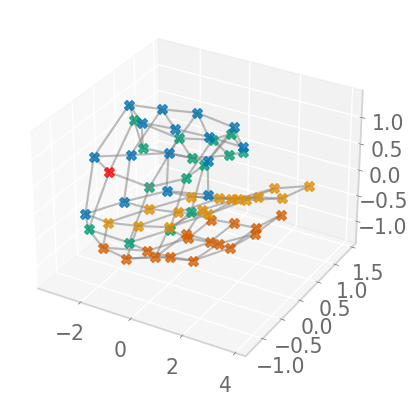

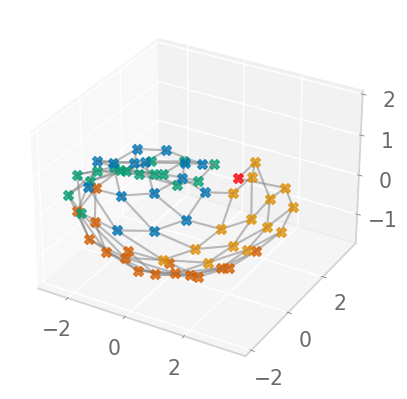

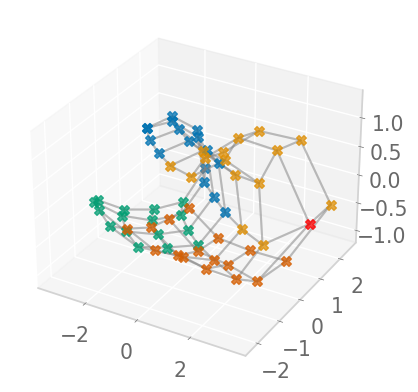

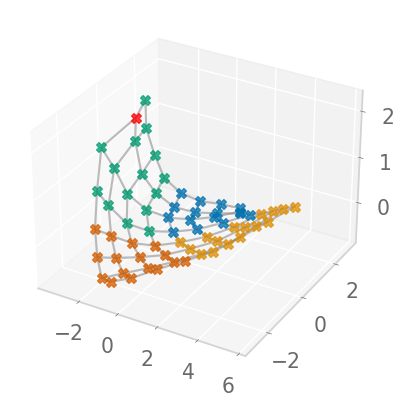

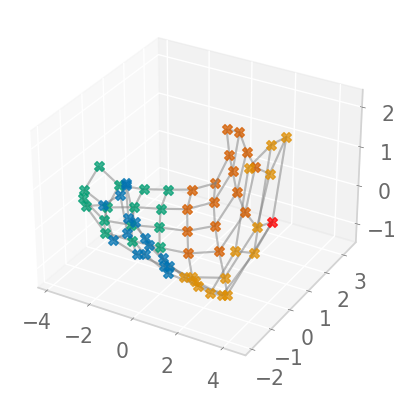

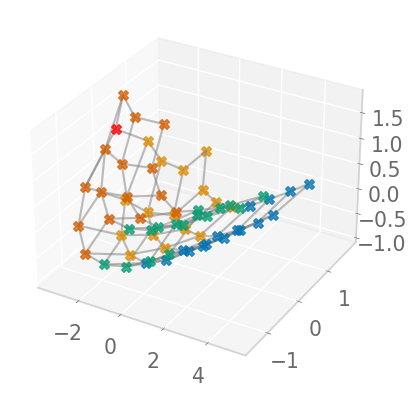

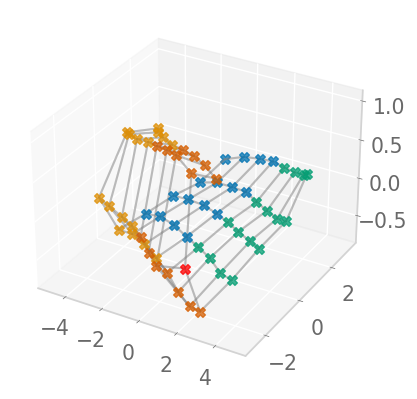

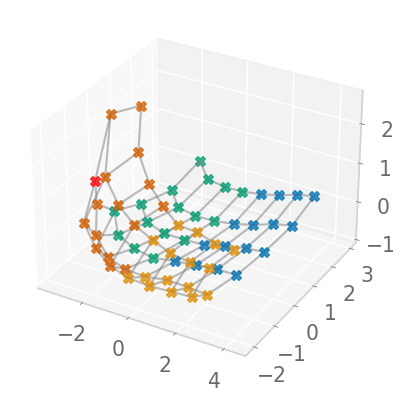

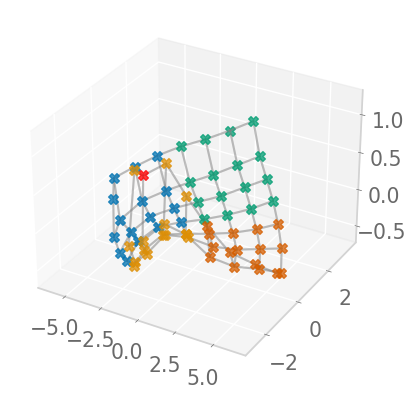

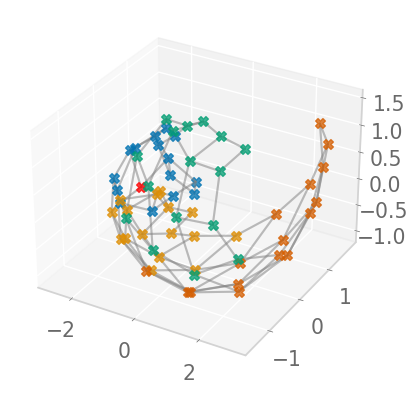

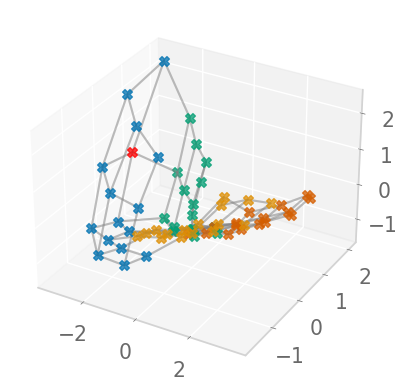

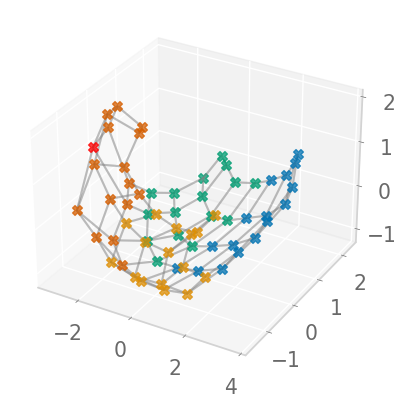

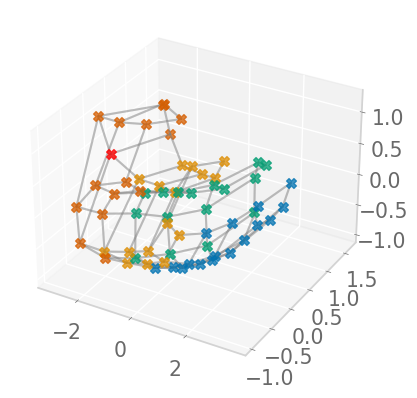

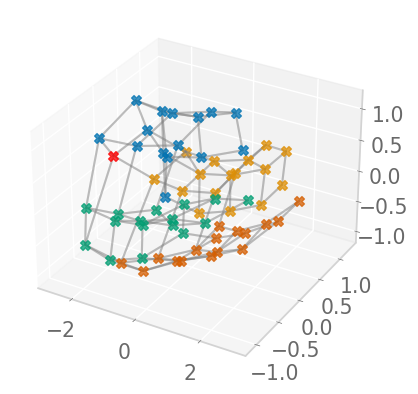

In [121]:
# MF + P/N
plot_latents_w_true_transitions(hue_order[-1])

### 3D latent plots + estimated transitions

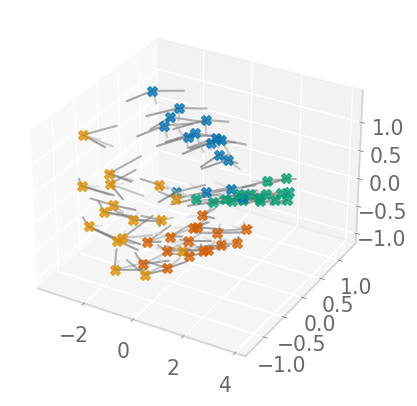

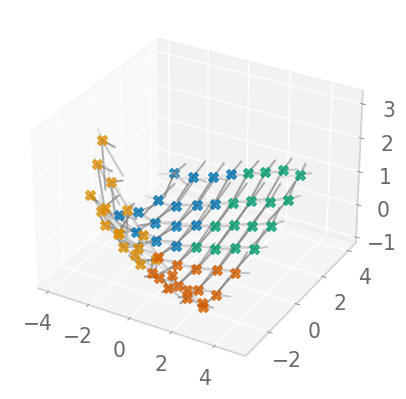

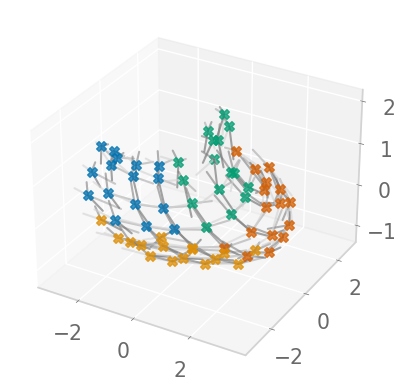

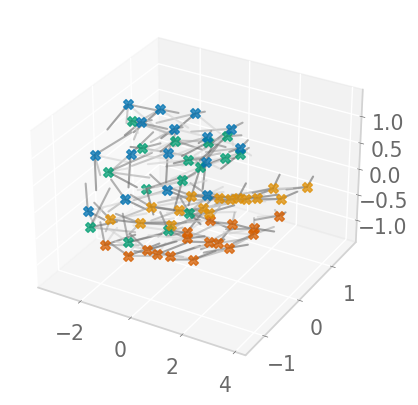

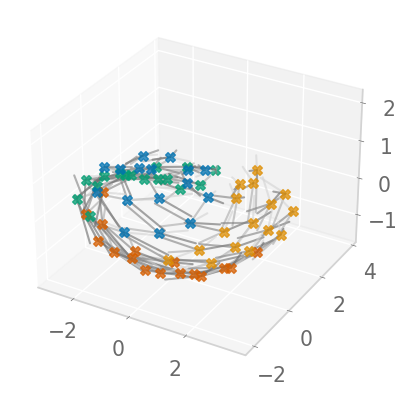

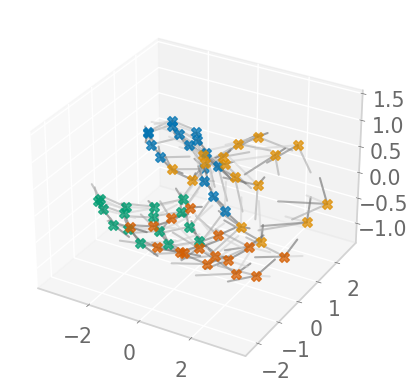

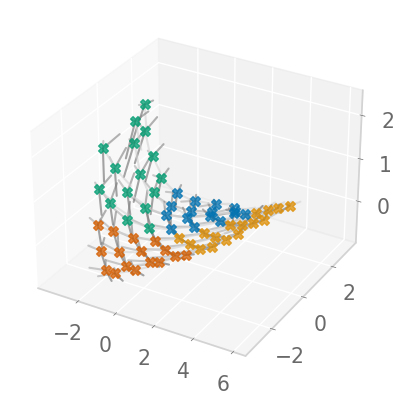

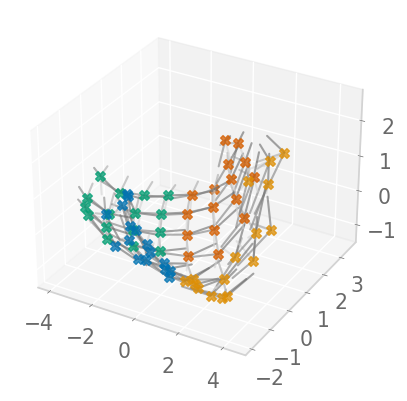

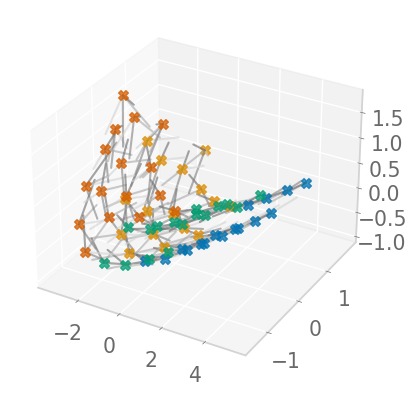

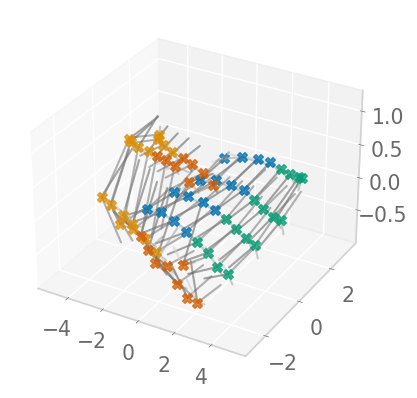

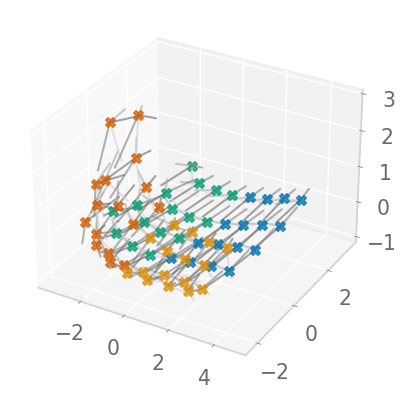

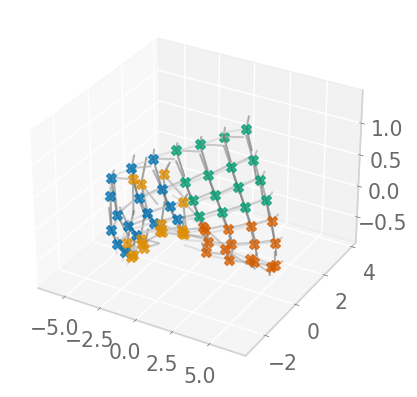

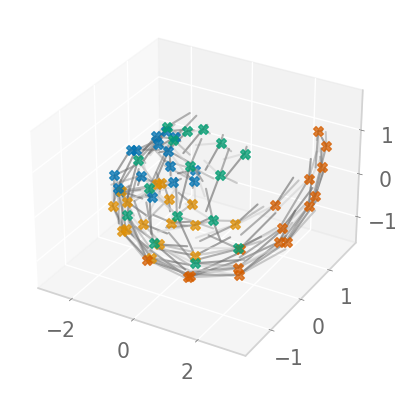

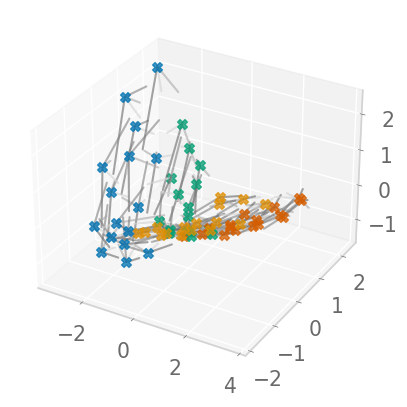

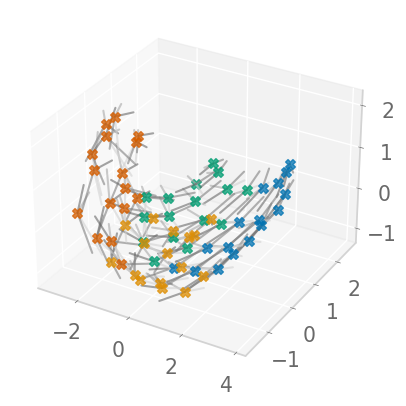

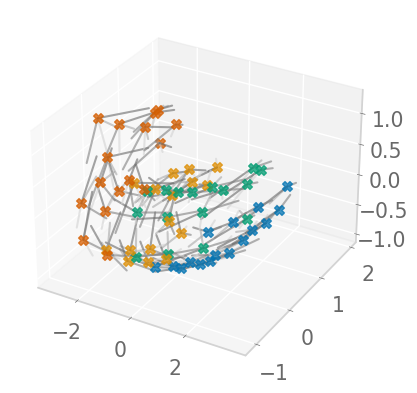

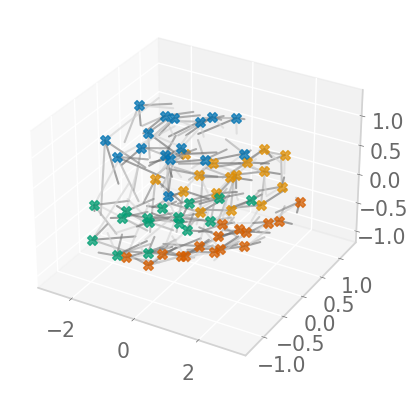

In [122]:
# MF + P/N
plot_latents_w_estimated_transitions(hue_order[-1])

# Comparing $\gamma$ timescales

### Parameters

In [123]:
internal_dim = 20
generic_exp_name = 'new_gridworld8x8_shuffobs'
network_yaml = 'dm_large_q'
episode = 600

In [124]:
internal_dim = 10
generic_exp_name = 'new_gridworld8x8'
network_yaml = 'dm'
episode = 350
hue_order = ['g0_-2_entro1',
    'g0.25_-2_entro0',
    'g0.5_-2_entro1',
    'g0.8_-4_entro1']

In [125]:
engram_dir = '/Volumes/aronov-locker/Ching/rl/'
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/' # Axon path
exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

### Load and plot

In [126]:
with open(f'{analysis_dir}representation_df_ep{episode}.p', 'rb') as f:
    repr_df = pickle.load(f)
with open(f'{analysis_dir}dimensionality_df_ep{episode}.p', 'rb') as f:
    dim_df = pickle.load(f)
with open(f'{analysis_dir}transition_df_ep{episode}.p', 'rb') as f:
    transition_df = pickle.load(f)
dim_df.model = dim_df.model.str[len(generic_exp_name)+1:]
print(np.unique(repr_df.model))

['new_gridworld8x8_entro-1' 'new_gridworld8x8_entro-2'
 'new_gridworld8x8_entro0' 'new_gridworld8x8_entro1'
 'new_gridworld8x8_entro2' 'new_gridworld8x8_g0.25_-2_entro-1'
 'new_gridworld8x8_g0.25_-2_entro-2' 'new_gridworld8x8_g0.25_-2_entro0'
 'new_gridworld8x8_g0.25_-2_entro1' 'new_gridworld8x8_g0.25_-3_entro-1'
 'new_gridworld8x8_g0.25_-3_entro-2' 'new_gridworld8x8_g0.25_-3_entro0'
 'new_gridworld8x8_g0.25_-3_entro1' 'new_gridworld8x8_g0.5_-2_entro-1'
 'new_gridworld8x8_g0.5_-2_entro-2' 'new_gridworld8x8_g0.5_-2_entro0'
 'new_gridworld8x8_g0.5_-2_entro1' 'new_gridworld8x8_g0.5_-3_entro-1'
 'new_gridworld8x8_g0.5_-3_entro-2' 'new_gridworld8x8_g0.5_-3_entro0'
 'new_gridworld8x8_g0.5_-3_entro1' 'new_gridworld8x8_g0.8_-3_entro-1'
 'new_gridworld8x8_g0.8_-3_entro-2' 'new_gridworld8x8_g0.8_-3_entro0'
 'new_gridworld8x8_g0.8_-3_entro1' 'new_gridworld8x8_g0.8_-4_entro-1'
 'new_gridworld8x8_g0.8_-4_entro-2' 'new_gridworld8x8_g0.8_-4_entro0'
 'new_gridworld8x8_g0.8_-4_entro1' 'new_gridworld8x8

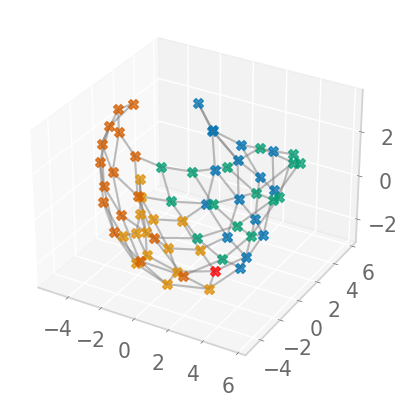

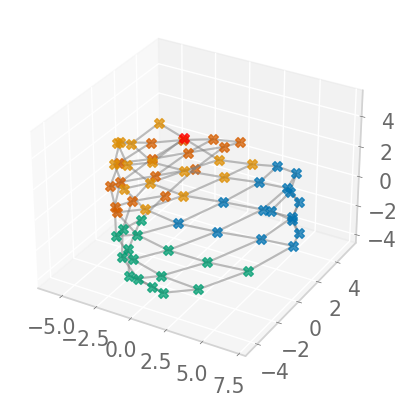

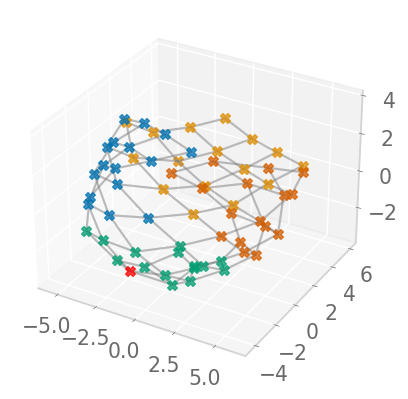

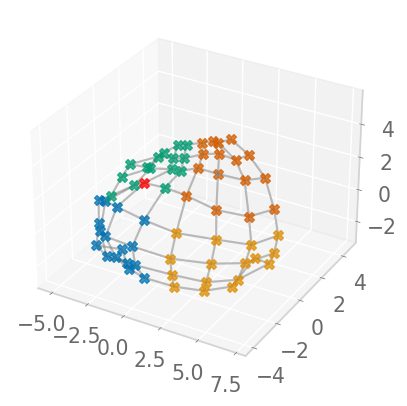

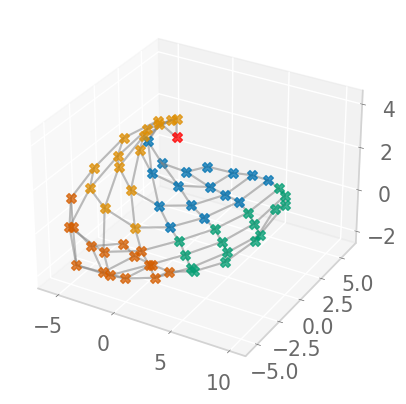

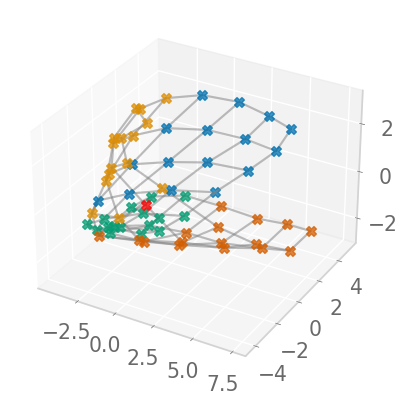

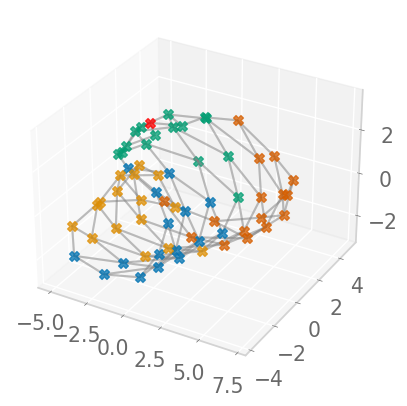

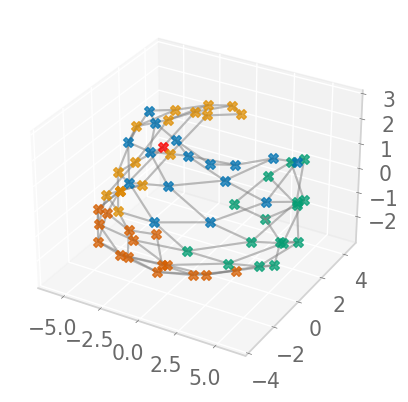

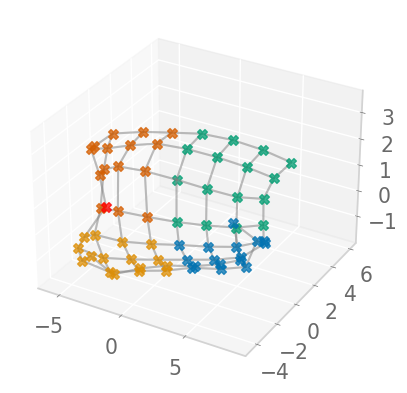

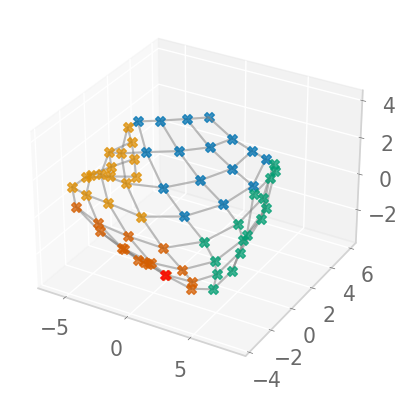

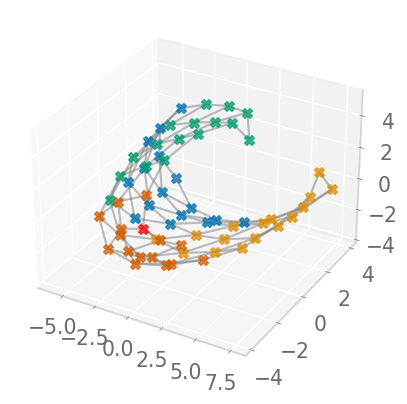

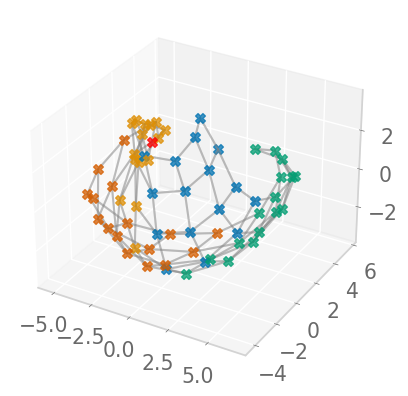

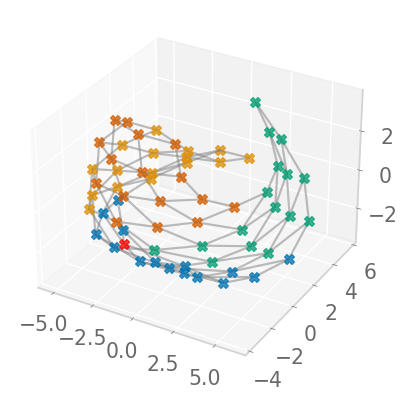

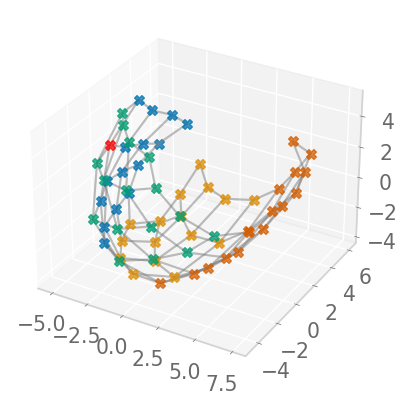

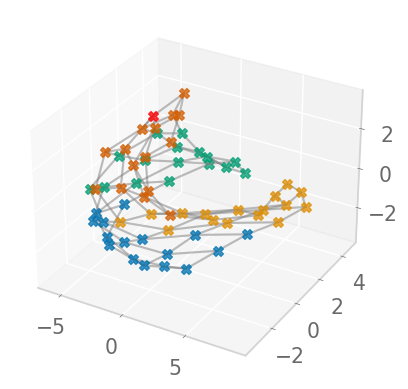

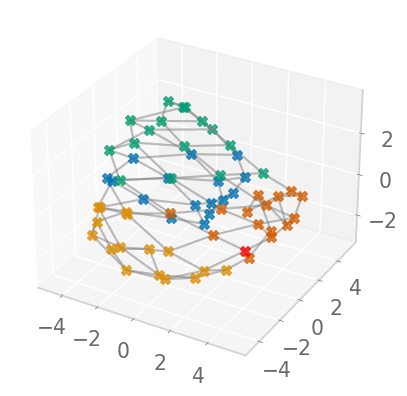

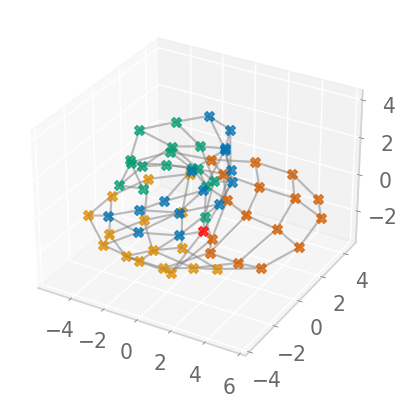

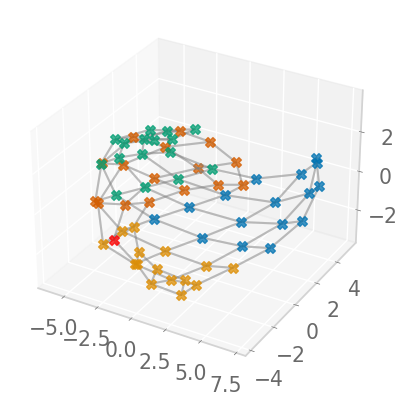

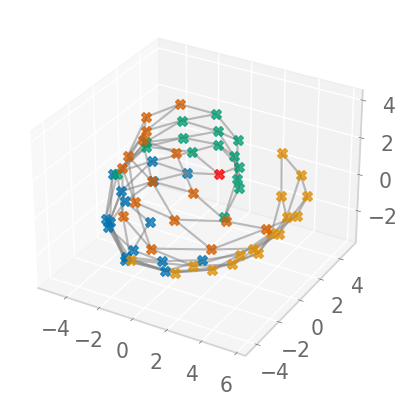

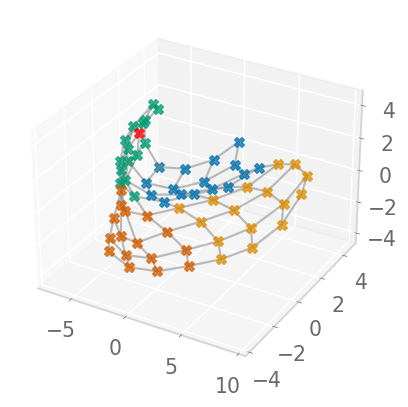

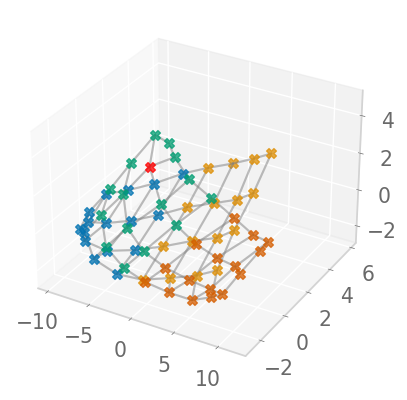

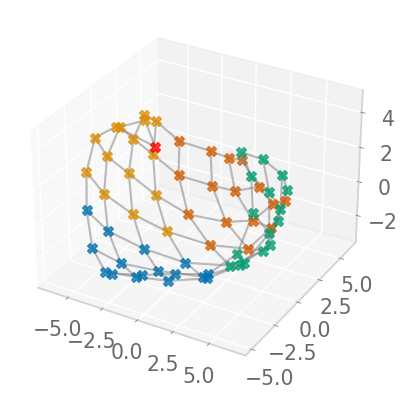

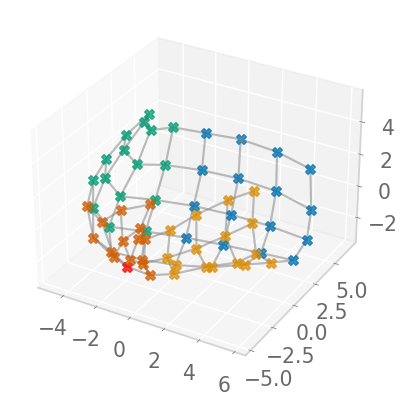

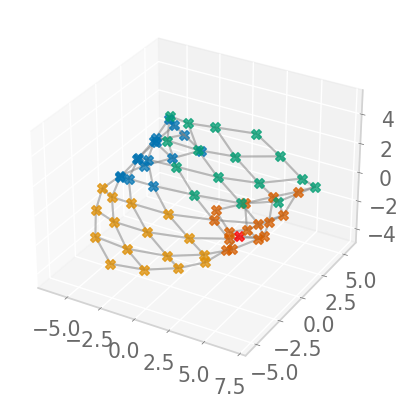

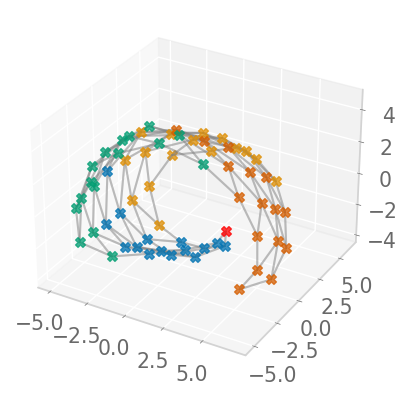

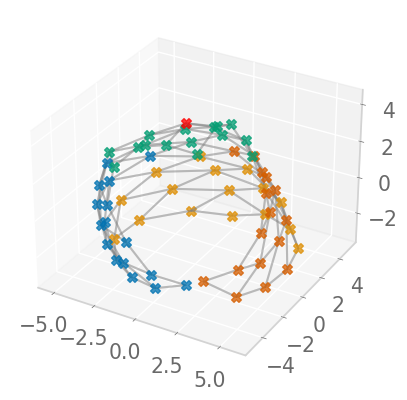

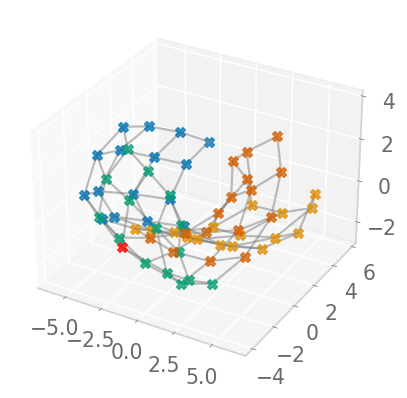

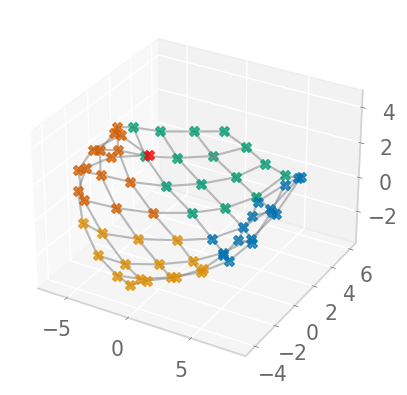

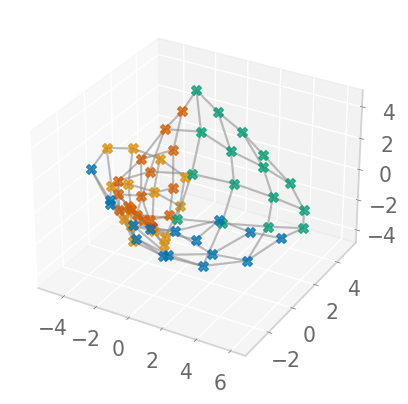

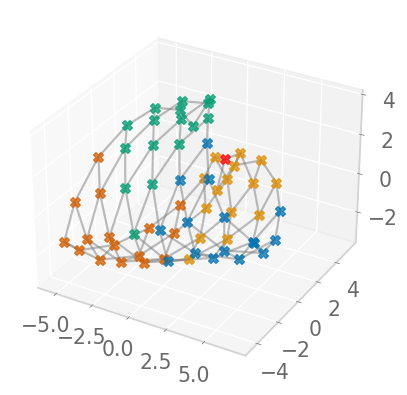

In [127]:
# MF + P/N
plot_latents_w_true_transitions(hue_order[2])